In [60]:

import requests
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import re
from io import StringIO
from html.parser import HTMLParser
from google.colab import files
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)
from sklearn.model_selection import train_test_split

import numpy as np

from wordcloud import WordCloud

%matplotlib inline

import re
pattern = r'\[.*?\]'

def RemoveBracketedContent(s):
  x = re.sub("([\(\[]).*?([\)\]])", "\g<1>\g<2>", s)
  return x

print(RemoveBracketedContent("[here we are]"))

[]


In [61]:
# API KEY: 4f2b327cf7af4f159e2938b50f0ad9ff

def RequestReturnDataFrameNews(fromDate, sortBy, termToQuery, key, saveToFileBool):
  url = ('https://newsapi.org/v2/everything?' +
       'q=' +termToQuery +'&' +
       'from=' + fromDate + '&' + 
       'sortBy=' + sortBy + '&'+
       'apiKey=' + key)
  response = requests.get(url)
  jsonTxt = response.json
  df = pd.DataFrame(response.json()['articles'])
  

  # Reduce the Date Published to a more simple format
  df['publishedAt'] = df['publishedAt'].str.rsplit('T', n=1).str.get(0)

  df = df.reindex(columns=['author','publishedAt','title','description','content'])
  if(saveToFileBool == True):
    df.to_csv('output.csv', encoding = 'utf-8-sig') 
    files.download('output.csv')

  df['label'] = termToQuery
  df['label'] =  df['label'].astype("category")
  df = df[['content', 'label']]
  df['content'] = df['content'].apply(RemoveBracketedContent)
  return df

TAG_RE = re.compile(r'<[^>]+>')
ESCAPE_RE = re.compile(r'')

def remove_tags(text):
    newtext = escape_ansi(text)
    return TAG_RE.sub('', newtext)

def escape_ansi(line):
    ansi_escape = re.compile(r'(\x9B|\x1B\[)[0-?]*[ -\/]*[@-~]')
    return ansi_escape.sub('', line)



In [68]:

dfBitcoin = RequestReturnDataFrameNews('2023-05-05', 'popularity', 'Bitcoin', '4f2b327cf7af4f159e2938b50f0ad9ff', False)
dfEth = RequestReturnDataFrameNews('2023-05-05', 'popularity', 'Ethereum', '4f2b327cf7af4f159e2938b50f0ad9ff', False)
dfDoge = RequestReturnDataFrameNews('2023-05-05', 'popularity', 'Dogecoin', '4f2b327cf7af4f159e2938b50f0ad9ff', False)
aggDf = pd.concat([dfBitcoin, dfEth, dfDoge], axis=0)

aggDf.to_csv('HomeWord5Output.csv', encoding = 'utf-8-sig') 
files.download('HomeWord5Output.csv')

aggDf.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,content,label
0,"Seemingly overnight, Sam Bankman-Fried, the fo...",Bitcoin
1,"When Elon Musk took over Twitter last year, ma...",Bitcoin
2,PlugwalkJoe pleads guilty for the massive 2020...,Bitcoin
3,A man accused of hacking Twitter accounts in a...,Bitcoin
4,"Former Terraform Labs CEO Do Kwon, alongside h...",Bitcoin


In [63]:
def RunCountVectorizerGetDF(df, strCol):
  cv = CountVectorizer(input="content", stop_words="english")
  strArr = df[strCol].tolist()
  dfMat = cv.fit_transform(strArr)
  print("CV Fit TransForm \n")
  print("Mat Type" ,type(dfMat))
  print("Getting Feature Names \n  \n")
  cols = cv.get_feature_names_out()
  print("Returning New Dataframe")
  newDF = pd.DataFrame(dfMat.toarray(), columns=cols)
  print(newDF.head())
  return newDF

def RunCountVectorizerGetArr(df, strCol):
  cv = CountVectorizer(input="content", stop_words="english")
  strArr = df[strCol].tolist()
  dfMat = cv.fit_transform(strArr)
  print("CV Fit TransForm \n")
  print("Mat Type" ,type(dfMat))
  x = np.array(dfMat.todense())
  return x


def RunCountVectorizerThenNaiveBayes(df, strCol):
  cv = CountVectorizer(input="content", stop_words="english")
  strArr = df[strCol].tolist()
  dfMat = cv.fit_transform(strArr)
  print("CV Fit TransForm \n")
  print("Mat Type" ,type(dfMat))
  print("Getting Feature Names \n  \n")
  cols = cv.get_feature_names_out()
  newDF = pd.DataFrame(dfMat.toarray(), columns=cols)
  
  labels = df['label']
  x = np.array(dfMat.todense())
  print("Creating Test Train Split 80/20")
  X_train, X_test, y_train, y_test = train_test_split(x, labels, 
                                                    test_size=0.2)
  print("Fitting Model")
  modelSent = MultinomialNB().fit(X_train, y_train)
  y_pred = modelSent.predict(X_test)
  
  print('Accuracy:', accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

  cmlabels = ["Bitcoin", "Dogecoin", "Ethereum"]
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cmlabels)
  disp.plot();

  return


#Reference: https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb

def CreateWordCloudFromDF(df):
  return

CV Fit TransForm 

Mat Type <class 'scipy.sparse._csr.csr_matrix'>
Getting Feature Names 
  

Creating Test Train Split 80/20
Fitting Model
Accuracy: 0.5166666666666667
              precision    recall  f1-score   support

     Bitcoin       0.61      0.46      0.52        24
    Dogecoin       0.55      0.65      0.59        17
    Ethereum       0.41      0.47      0.44        19

    accuracy                           0.52        60
   macro avg       0.52      0.53      0.52        60
weighted avg       0.53      0.52      0.52        60



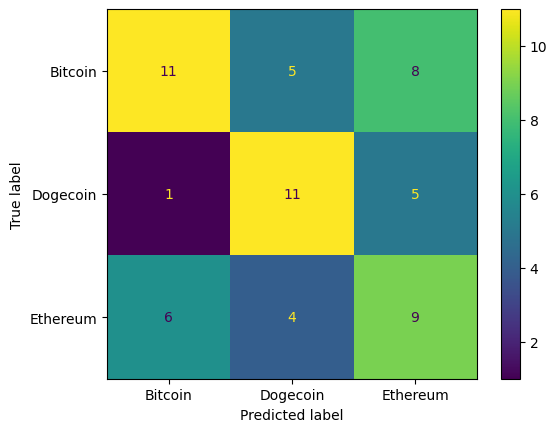

In [64]:
RunCountVectorizerThenNaiveBayes(aggDf, "content")

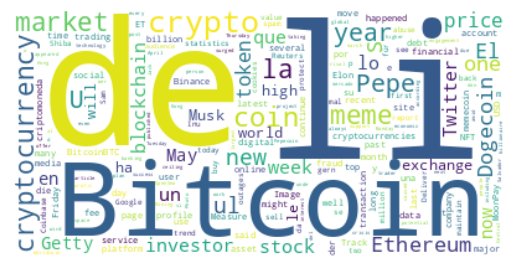

In [65]:
aggText = "".join(row for row in aggDf['content'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(aggText)
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")
plt.show()

In [66]:
aggText

'Seemingly overnight, Sam Bankman-Fried, the founder of FTX, went from cryptocurrency wunderkind to wanted for questioning by the FBI. After years of unfettered success, the walls of SBF\'s blockchain … []When Elon Musk took over Twitter last year, many users migrated to the free and open-source platform Mastodon. Mastodon, like other decentralized social media, isnt owned by one of the major players … []PlugwalkJoe pleads guilty for the massive 2020 Twitter hack and other crimes\r\nPlugwalkJoe pleads guilty for the massive 2020 Twitter hack and other crimes\r\n / The hack compromised numerous high-profi… []A man accused of hacking Twitter accounts in a Bitcoin scheme pleaded guilty on Tuesday for his role in cyber stalking and computer hacking that exploited numerous high-profile social media accounts.… []Former Terraform Labs CEO Do Kwon, alongside his compatriot and former chief financial officer Han Chong-joon have been on the run from international police for months. They were arr